# Convolutional Neural Networks (CNNs)

This tutorial is based on:

https://www.tensorflow.org/tutorials/images/cnn

We shall reproduce and add to that tutorial which uses the the CIFAR10 dataset

Adaptions are permitted as specified by:
https://creativecommons.org/licenses/by/4.0/

# Task 0

Run the Tensorflow cnn tutorial in Google Colaboratory. Save the output as a separate file. Then return here.


Additionally, the tutorials:

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

and 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

may help you with some of the tasks in this notebook. 


This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Import Numpy

In [4]:
import numpy as np

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Task 1 
Verify the sizes of the test and training sets.

### TASK 1 SOLUTION

In [6]:
print("size of test images:", test_images.size)

size of test images: 30720000


In [7]:
print("size of test labels:", test_labels.size)

size of test labels: 10000


In [8]:
print("size of train_images:", train_images.size)

size of train_images: 153600000


In [9]:
print("size of train_labels:", train_labels.size)

size of train_labels: 50000


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


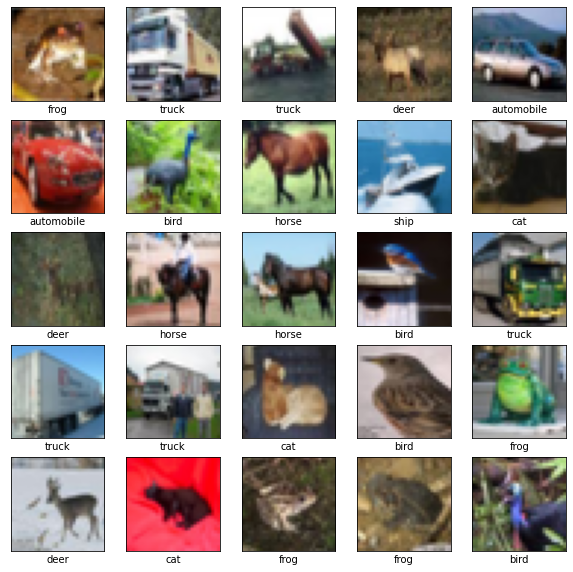

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Task 2
Choose an element of the test set, plot it, and place its class label on the x-axis.

### TASK 2 SOLUTION

To get all the elemnts in our test set, we can visually see this with a figute plot, then we can go further to plot an element from the element below, and place its class label on the x-axis

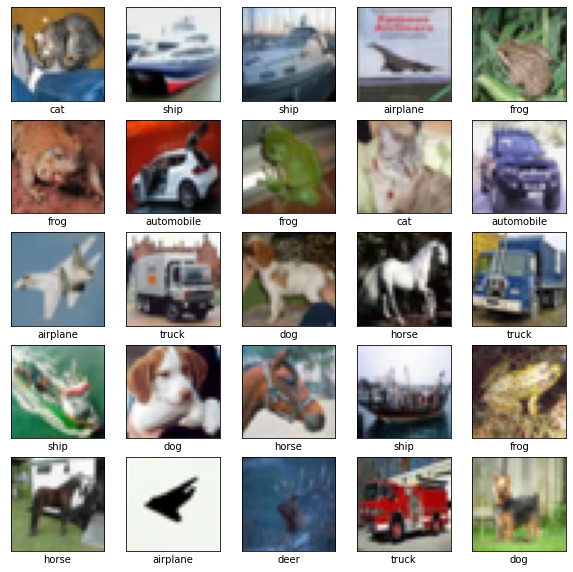

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

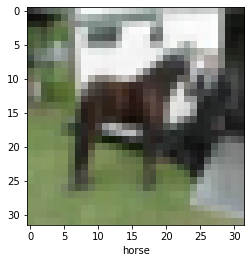

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
B = 20
img = test_images[20]
plt.figure()
plt.imshow(test_images[B])
plt.grid(False)
plt.xlabel(class_names[test_labels[B][0]])
plt.show()

# Task 3

Create the same cnn to that of https://www.tensorflow.org/tutorials/images/cnn, but add dropout renormalization with a rate of 50% in a few places, e.g.  after each max-pooling layers and also between the two dense layers of model.
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

Display a summary of your neural network, showing the architecture.

### TASK 3 SOLUTION

In [12]:
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [14]:
# Adding the dropout function between the two dense layers 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

# Task 4
### Compile and train the model


Keep track of the best set of weights using the ModelCheckpoint:

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

Monitor accuracy on the valudation set, and only save the best weights.
Save the checkpoint in an hdf5 file.

You may refer to the following tutorials to help you with this task:

https://www.tensorflow.org/tutorials/keras/save_and_load

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

First compile the model as before

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
checkpoint_filepath = "best_weights.hdf5"
checkpointer_callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',verbose =1 ,
    save_best_only=True)

## TASK 4 SOLUTION

**COMPILING AND TRAINING THE MODEL**

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.8559 - accuracy: 0.3111 - val_loss: 1.5564 - val_accuracy: 0.4548
Epoch 2/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.5487 - accuracy: 0.4395 - val_loss: 1.4382 - val_accuracy: 0.4742
Epoch 3/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.4499 - accuracy: 0.4793 - val_loss: 1.2760 - val_accuracy: 0.5468
Epoch 4/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.3835 - accuracy: 0.5084 - val_loss: 1.2893 - val_accuracy: 0.5466
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.3430 - accuracy: 0.5225 - val_loss: 1.2033 - val_accuracy: 0.5677
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.2978 - accuracy: 0.5397 - val_loss: 1.2127 - val_accuracy: 0.5788
Epoch 7/10
50000/50000 [==============================] 

**MONITORING THE ACCURACY ON THE VALIDATION SET, AND ONLY SAVING THE BEST WEIGHTS WE HAVE**

In [18]:
checkpoint_filepath = "best_weights.hdf5"
checkpointer_callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',verbose =1 ,
    save_best_only=True)

# Task 5
Train for a minimum of 10 epochs using the checkpoint callback.

In [19]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 verbose=1)

In [21]:
# training for minimum of 10 epochs using the checkpoint callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49952/50000 [============================>.] - ETA: 0s - loss: 1.2021 - accuracy: 0.5796
Epoch 00001: saving model to best_weights.hdf5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.2021 - accuracy: 0.5796 - val_loss: 1.1619 - val_accuracy: 0.5960
Epoch 2/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.1923 - accuracy: 0.5808
Epoch 00002: saving model to best_weights.hdf5
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.1923 - accuracy: 0.5809 - val_loss: 1.0490 - val_accuracy: 0.6321
Epoch 3/10
49952/50000 [============================>.] - ETA: 0s - loss: 1.1763 - accuracy: 0.5919
Epoch 00003: saving model to best_weights.hdf5
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.1763 - accuracy: 0.5919 - val_loss: 1.0376 - val_accuracy: 0.6340
Epoch 4/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.1634 - accuracy: 0.

### Evaluate the model

# Task 6
Plot the training and validation loss. Make an additional plot showing training and validation accuracy.

Load the best weights you found (c.f. https://www.tensorflow.org/tutorials/keras/save_and_load)

Save the model's architecture, weights and training configuration in a hdf5 file.

In [20]:
model.load_weights('best_weights.hdf5')

In [21]:
model.save('shapes_cnn.h5')

### TASK 6 SOLUTION

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.1058 - accuracy: 0.6166 - val_loss: 1.0140 - val_accuracy: 0.6418
Epoch 2/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.1005 - accuracy: 0.6155 - val_loss: 0.9799 - val_accuracy: 0.6549
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.1030 - accuracy: 0.6181 - val_loss: 1.0372 - val_accuracy: 0.6384
Epoch 4/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.0956 - accuracy: 0.6202 - val_loss: 1.0507 - val_accuracy: 0.6264
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.0878 - accuracy: 0.6229 - val_loss: 0.9839 - val_accuracy: 0.6603
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.0838 - accuracy: 0.6231 - val_loss: 0.9621 - val_accuracy: 0.6588
Epoch 7/10
50000/50000 [==============================] 

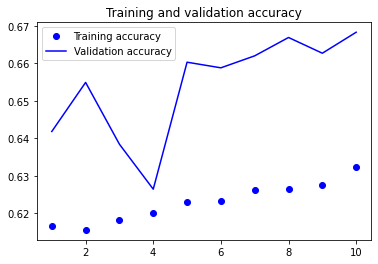

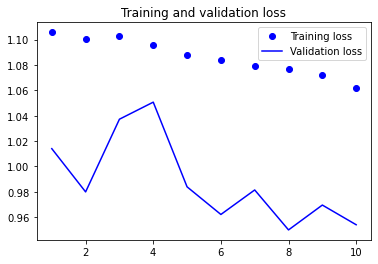

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Task 7

Select an image in the test set, plot it, show the prediction for it from your trained neural network, using model.predict.

The tutorial https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0 

may be helpful.


Select a few more images. Comment on instances of misclassification.



### TASK 7 SOLUTION

PREDICTION: [[-0.04577903 -3.1467762   0.42167148  0.4955802   1.1212521  -0.22827156
  -1.2876137  -0.8035703  -0.11229479 -1.5385424 ]]


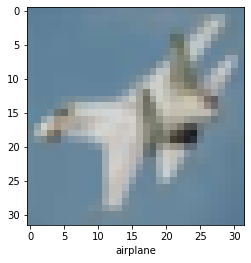

In [24]:
#Showing predictions in the test set, we have
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
C = 10
img = test_images[10]
plt.figure()
plt.imshow(test_images[C])
plt.grid(False)
plt.xlabel(class_names[test_labels[C][0]])
image = np.expand_dims(img, axis=0)
model.predict(image)
print("PREDICTION:", model.predict(image))

PREDICTION: [[ 0.8646898  -0.41261896  0.4998014  -0.5330403   0.30711135 -1.2611352
  -0.65476173 -1.4968551  -0.14848618 -0.6197886 ]]


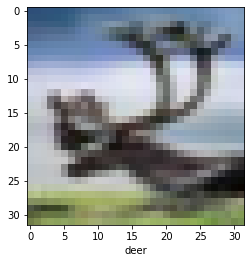

In [25]:
#selecting few more images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
D = 40
img = test_images[40]
plt.figure()
plt.imshow(test_images[D])
plt.grid(False)
plt.xlabel(class_names[test_labels[D][0]])
image = np.expand_dims(img, axis=0)
model.predict(image)
print("PREDICTION:", model.predict(image))

PREDICTION: [[-1.1138233  -2.1275852   1.6893328   0.8161181   1.2766346   0.18415329
   1.3075849  -1.0456648  -2.3575099  -1.3822637 ]]


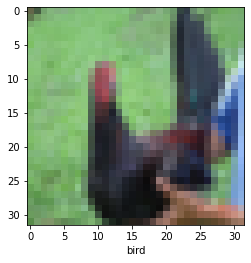

In [26]:
#selecting few more images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
E = 25
img = test_images[25]
plt.figure()
plt.imshow(test_images[E])
plt.grid(False)
plt.xlabel(class_names[test_labels[E][0]])
image = np.expand_dims(img, axis=0)
model.predict(image)
print("PREDICTION:", model.predict(image))

# Task 8 (optional)
For a particular member of the test set, that you chose in Task 7, e.g. test_images[40] is the 40th image of the test set.

Plot a few feature maps and filters. You may adapt the code in 

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

and 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [27]:
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers

In [28]:
layer_outputs

[<tf.Tensor 'conv2d/Identity:0' shape=(None, 30, 30, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'dropout/Identity:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/Identity:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'dropout_1/Identity:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Identity:0' shape=(None, 4, 4, 64) dtype=float32>,
 <tf.Tensor 'flatten/Identity:0' shape=(None, 1024) dtype=float32>,
 <tf.Tensor 'dense/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dropout_2/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_1/Identity:0' shape=(None, 10) dtype=float32>]

In [29]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

In [30]:
numtest = 40 #the same element of the test set that you chose for Task 7
imtest = np.expand_dims(test_images[numtest],axis=0)

In [31]:
activations = activation_model.predict(imtest)

### TASK 8 SOLUTION

In [32]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


**This simply means its a 30 by 30 feature map with 32 channels**

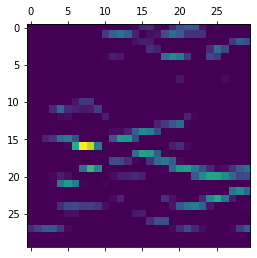

In [33]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Task 9 (optional)

Plot a few feature maps and filters. You may adapt the code in 

https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

and 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/


In [34]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

In [35]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

In [36]:
numtest = 25 #the same element of the test set that you chose for Task 7
imtest = np.expand_dims(test_images[numtest],axis=0)

In [37]:
activations_1 = activation_model.predict(imtest)

In [38]:
second_layer_activation = activations_1[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


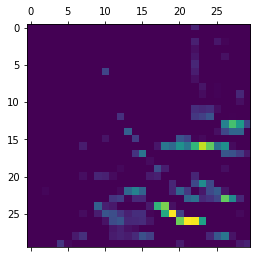

In [39]:
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')